In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/customer_journey.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# 데이터 EDA & 전처리

In [3]:
df.shape

(12330, 18)

In [4]:
# 대부분의 데이터는 수치형
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## 결측치 확인

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# 이상치 확인

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# 컬럼별 상세 확인
for col in df.columns:
    print(f'feature num : {df[col].nunique()}')
    print(f'feature unique : {df[col].unique()}')

feature num : 27
feature unique : [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
feature num : 3335
feature unique : [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
feature num : 17
feature unique : [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
feature num : 1258
feature unique : [  0.   120.    16.   ... 547.75 368.25 211.25]
feature num : 311
feature unique : [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 1

## Page 데이터 탐색

- 월 별

In [8]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [9]:
# 월별로 정렬 : 1년이 아닌 2월부터 12월까지 4월읠 제외한 총 10개월의 데이터
pd.DataFrame(df['Month'].value_counts(), index=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

,Month
Feb,184
Mar,1907
May,3364
June,288
Jul,432
Aug,433
Sep,448
Oct,549
Nov,2998
Dec,1727


- page filter

In [10]:
df_page_filter = df[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues']]
df_page_filter

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,1,0.200000,0.200000,0.000000
1,0,0,2,0.000000,0.100000,0.000000
2,0,0,1,0.200000,0.200000,0.000000
3,0,0,2,0.050000,0.140000,0.000000
4,0,0,10,0.020000,0.050000,0.000000
...,...,...,...,...,...,...
12325,3,0,53,0.007143,0.029031,12.241717
12326,0,0,5,0.000000,0.021333,0.000000
12327,0,0,6,0.083333,0.086667,0.000000
12328,4,0,15,0.000000,0.021053,0.000000


In [13]:
# 관리/정보/제품 페이지별 ID 여정 : 총 3131개별 이탈률, 종료율, 페이지클릭수 평균
df_page_filter = df_page_filter.groupby(['Administrative', 'Informational', 'ProductRelated'], as_index=False).mean()
df_page_filter['Administrative'].nunique()

27

In [15]:
# Administrative ID 별
df_page_filter[df_page_filter['Administrative']==0]

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517
...,...,...,...,...,...,...
362,0,7,162,0.004790,0.019257,0.000000
363,0,8,51,0.003390,0.015405,0.000000
364,0,9,12,0.007018,0.019298,0.000000
365,0,10,60,0.002857,0.034059,0.000000


In [16]:
df_page_filter.sort_values(by='PageValues', ascending=False)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
463,1,0,114,0.000000,0.000590,255.569158
1306,4,0,62,0.000000,0.001042,246.758590
2384,8,3,52,0.000000,0.005172,214.306663
3121,22,3,205,0.001747,0.008801,177.528825
2943,13,1,59,0.000000,0.004545,167.230834
...,...,...,...,...,...,...
1931,6,2,32,0.001961,0.014216,0.000000
1930,6,2,30,0.035370,0.057235,0.000000
773,2,0,115,0.000000,0.002849,0.000000
1927,6,2,25,0.013333,0.043333,0.000000


# 구매 여정 분석

## 페이지 뷰 별

In [17]:
df_page_filter.sort_values(by=['PageValues'], ascending=True)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1200,3,4,1,0.000000,0.025000,0.000000
1199,3,3,290,0.012383,0.024238,0.000000
2443,9,0,20,0.019024,0.032204,0.000000
2444,9,0,21,0.026923,0.051538,0.000000
...,...,...,...,...,...,...
2943,13,1,59,0.000000,0.004545,167.230834
3121,22,3,205,0.001747,0.008801,177.528825
2384,8,3,52,0.000000,0.005172,214.306663
1306,4,0,62,0.000000,0.001042,246.758590


In [20]:
# 반에 해당하는 여정이 아무런 액션을 취하지 않았다.
df_page_filter[df_page_filter['PageValues']==0]

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.0
40,0,0,40,0.011553,0.032616,0.0
46,0,0,46,0.009783,0.025214,0.0
52,0,0,52,0.006397,0.027845,0.0
56,0,0,56,0.006004,0.021496,0.0
...,...,...,...,...,...,...
3102,18,3,247,0.011229,0.029681,0.0
3103,18,4,178,0.003646,0.010805,0.0
3116,21,3,170,0.000000,0.004515,0.0
3124,23,5,88,0.015759,0.031588,0.0


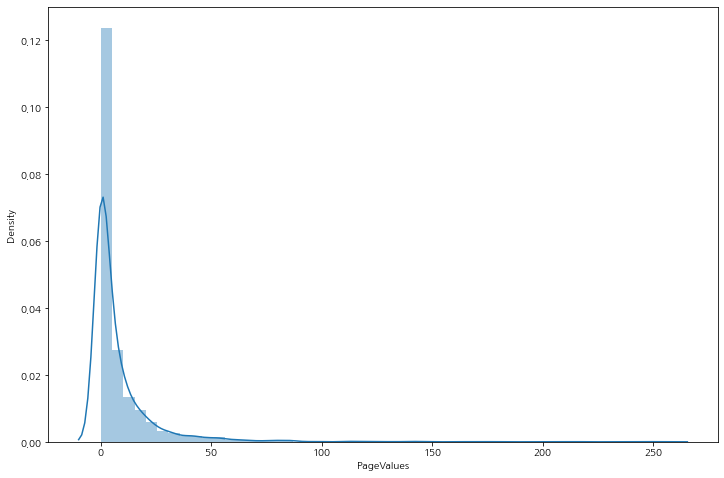

In [19]:
plt.figure(figsize=(12, 8))
sns.distplot(df_page_filter['PageValues'])
plt.show()

## 이탈률 탐색

In [22]:
# 평균 이탈율 : 0.7%
df_page_filter['BounceRates'].mean()

0.00746099327081189

In [21]:
df_page_filter.sort_values(by='BounceRates', ascending=False)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
133,0,1,0,0.200000,0.200000,0.000000
479,1,1,0,0.200000,0.200000,0.000000
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
135,0,1,2,0.100000,0.133333,0.000000
...,...,...,...,...,...,...
2537,9,2,9,0.000000,0.017647,0.000000
335,0,4,38,0.000000,0.026190,0.000000
2541,9,2,18,0.000000,0.007667,37.699200
2544,9,2,23,0.000000,0.022917,6.064426


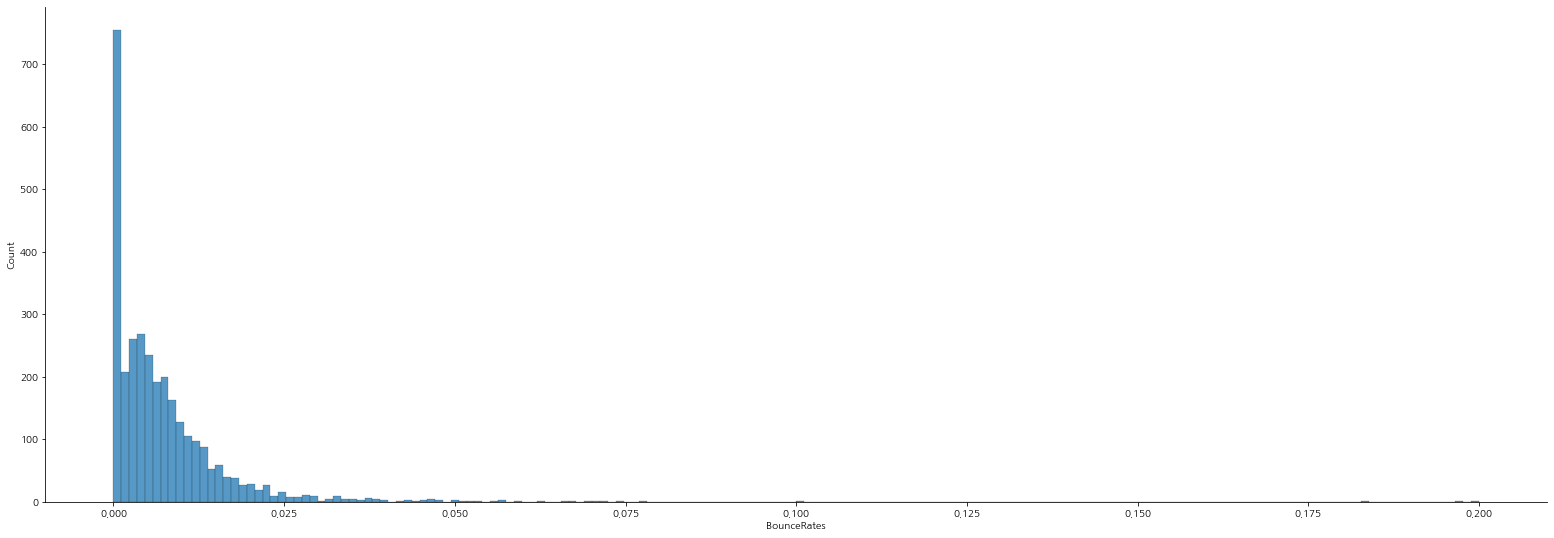

In [24]:
sns.displot(df_page_filter, x='BounceRates')
plt.gcf().set_size_inches(25, 8)
plt.show()

In [25]:
df_page_filter['BounceRates'].describe()

count    3131.000000
mean        0.007461
std         0.011096
min         0.000000
25%         0.001362
50%         0.005000
75%         0.009804
max         0.200000
Name: BounceRates, dtype: float64

In [26]:
len(df_page_filter[df_page_filter['BounceRates']>0.009804])

781

In [27]:
df_page_filter[df_page_filter['BounceRates']>0.009804]

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517
...,...,...,...,...,...,...
3119,22,3,92,0.014613,0.020072,7.935286
3124,23,5,88,0.015759,0.031588,0.000000
3125,24,1,113,0.019308,0.047477,2.613453
3128,24,6,189,0.018642,0.043831,0.870148


- Administrative 별

In [38]:
df_admin = df_page_filter[df_page_filter['BounceRates']>0.009804].groupby('Administrative', as_index=False)['Informational'].count().sort_values(by='Informational', ascending=False).set_index(keys='Administrative')
df_admin.columns = ['count']
df_admin

,count
Administrative,
0,140
1,86
2,81
3,68
5,63
4,54
6,52
9,45
8,42


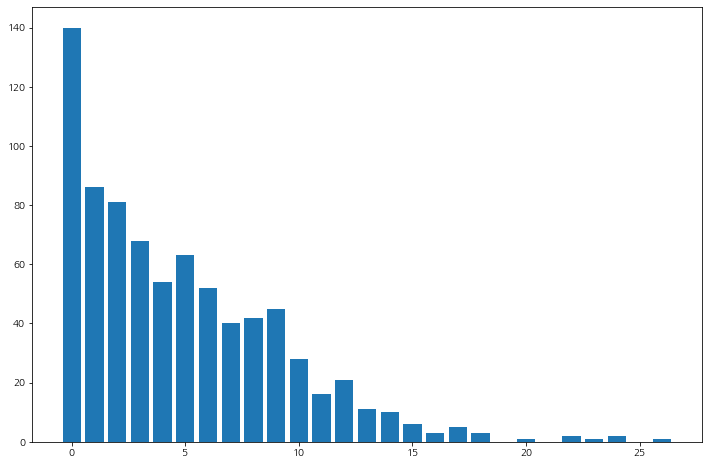

In [41]:
plt.figure(figsize=(12, 8))
plt.bar(df_admin.index, df_admin['count'])
plt.show()

- Informational 별

In [42]:
df_page_filter.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'BounceRates',
       'ExitRates', 'PageValues'],
      dtype='object')

In [43]:
df_info = df_page_filter[df_page_filter['BounceRates']>0.009804].groupby('Informational', as_index=False)['ProductRelated'].count().sort_values(by='ProductRelated', ascending=False).set_index(keys='Informational')
df_info.columns = ['count']
df_info

,count
Informational,
0,248
1,173
2,138
3,92
4,63
5,28
6,21
7,12
9,4


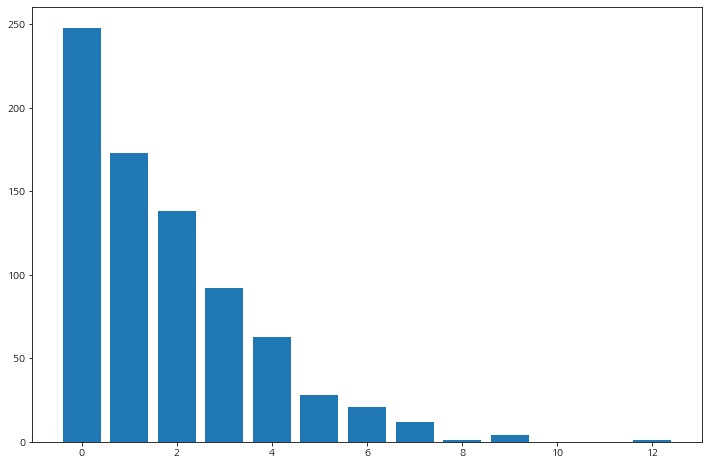

In [44]:
plt.figure(figsize=(12, 8))
plt.bar(df_info.index, df_info['count'])
plt.show()

- ProductRelated 별

In [45]:
df_prod = df_page_filter[df_page_filter['BounceRates']>0.009804].groupby('ProductRelated', as_index=False)['BounceRates'].count().sort_values(by='BounceRates', ascending=False).set_index(keys='ProductRelated')
df_prod.columns = ['count']
df_prod

,count
ProductRelated,
36,18
23,15
8,15
27,15
11,14
...,...
155,1
156,1
159,1


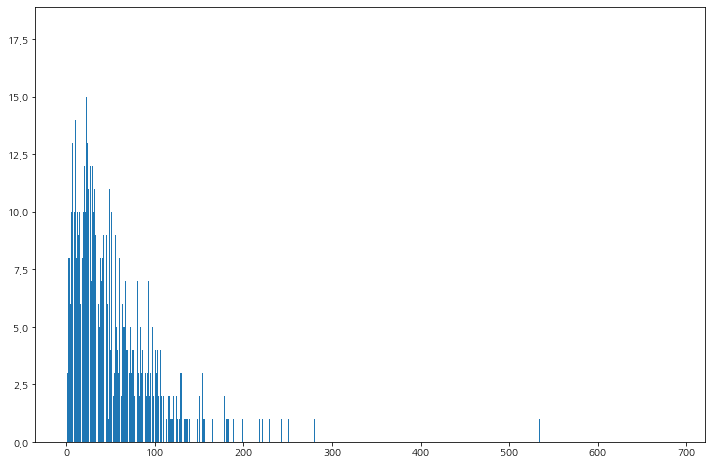

In [46]:
plt.figure(figsize=(12, 8))
plt.bar(df_prod.index, df_prod['count'])
plt.show()